<a href="https://colab.research.google.com/github/RohithThota2509/ML-assignment-1-206/blob/main/ML_assignment_1(206).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd

# Load the dataset (replace path with your local path if downloaded)
df = pd.read_csv("/content/drive/MyDrive/MLlab/credit_scoring.csv")

# Check the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())
df.info()
# List all column names
print(df.columns)


   ID  Default  Prct_uso_tc  Edad  Nro_prestao_retrasados  \
0   1        1     0.766127    45                       2   
1   2        0     0.957151    40                       0   
2   3        0     0.658180    38                       1   
3   4        0     0.233810    30                       0   
4   5        0     0.907239    49                       1   

   Prct_deuda_vs_ingresos  Mto_ingreso_mensual  Nro_prod_financieros_deuda  \
0                0.802982               9120.0                          13   
1                0.121876               2600.0                           4   
2                0.085113               3042.0                           2   
3                0.036050               3300.0                           5   
4                0.024926              63588.0                           7   

   Nro_retraso_60dias  Nro_creditos_hipotecarios  Nro_retraso_ultm3anios  \
0                   0                          6                       0   
1           

In [40]:


# Define features and target
X = df.drop(columns=["ID", "Default"])  # drop ID and target column
y = df["Default"]  # target column

# Convert to numeric (just to be safe)
X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120000, 10)
X_test shape: (30000, 10)
y_train shape: (120000,)
y_test shape: (30000,)


In [43]:
# Drop rows with any NaN values
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, LogisticRegression

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/MLlab/credit_scoring.csv")

# Define features and target
X = df.drop(columns=["ID", "Default"])
y = df["Default"]

# Split into training + validation (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Impute missing values (replace NaN with column mean)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# ------------------------
# Ridge Regression (L2)
# ------------------------
ridge = Ridge(alpha=1.0)
cv_scores_ridge = cross_val_score(ridge, X_train_imputed, y_train, cv=5, scoring='r2')
print("Ridge Regression CV R^2 scores:", cv_scores_ridge)
print("Mean CV R^2:", cv_scores_ridge.mean())

# Fit Ridge on entire training set
ridge.fit(X_train_imputed, y_train)
print("Ridge Test R^2:", ridge.score(X_test_imputed, y_test))

# ------------------------
# Logistic Regression (L2) for binary target
# ------------------------
log_reg = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, random_state=42)
cv_scores_log = cross_val_score(log_reg, X_train_imputed, y_train, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy scores:", cv_scores_log)
print("Mean CV Accuracy:", cv_scores_log.mean())

# Fit Logistic Regression on entire training set
log_reg.fit(X_train_imputed, y_train)
print("Logistic Regression Test Accuracy:", log_reg.score(X_test_imputed, y_test))


Ridge Regression CV R^2 scores: [0.05542187 0.06279171 0.05280958 0.0593009  0.05609295]
Mean CV R^2: 0.05728340324928298
Ridge Test R^2: 0.0453479072805576
Logistic Regression CV Accuracy scores: [0.93266667 0.93391667 0.93295833 0.932625   0.933125  ]
Mean CV Accuracy: 0.9330583333333333
Logistic Regression Test Accuracy: 0.9347666666666666


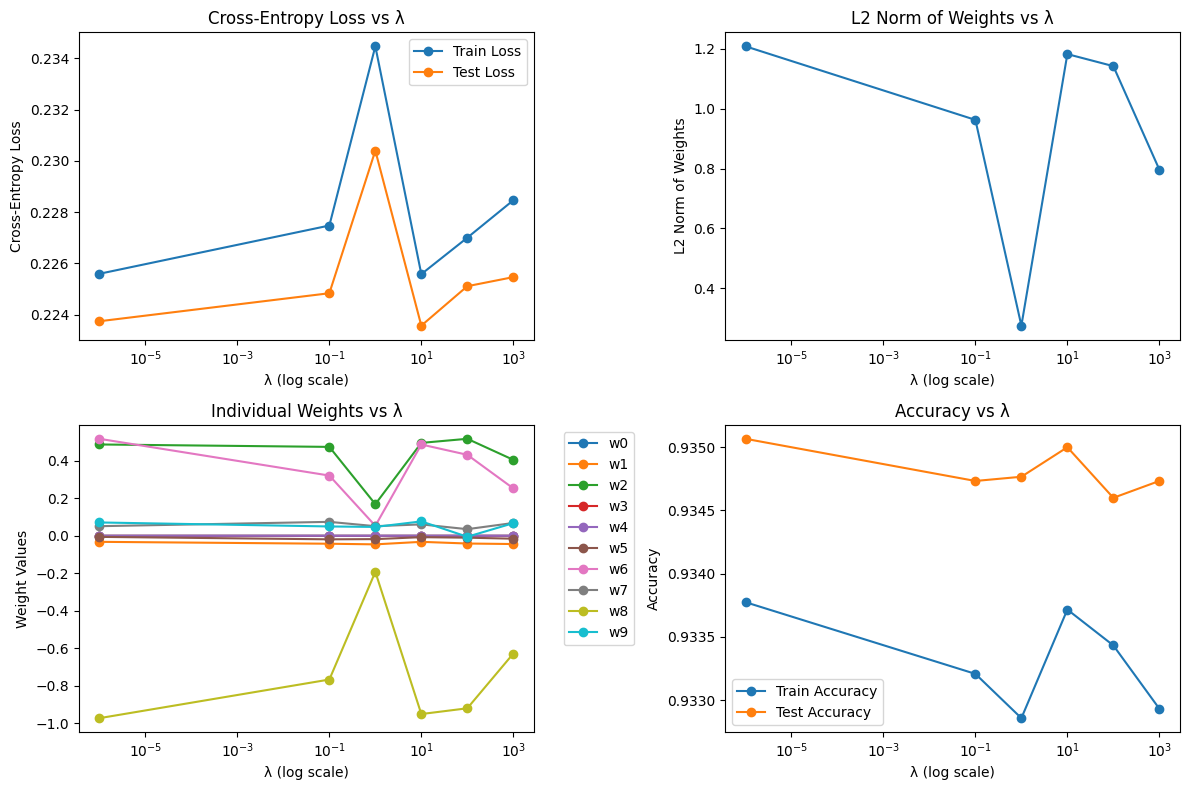

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/MLlab/credit_scoring.csv")

# Define features and target
X = df.drop(columns=["ID", "Default"])
y = df["Default"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Regularization strengths
lambdas = [0.000001, 0.1, 1, 10, 100, 1000]  # λ
C_values = [1/l if l != 0 else 1e12 for l in lambdas]  # C = 1/λ

# Storage
train_losses, test_losses = [], []
train_accs, test_accs = [], []
weight_norms = []
all_weights = []

for C in C_values:
    # Logistic regression with L2
    log_reg = LogisticRegression(
        penalty='l2',
        C=C,
        solver='liblinear',
        random_state=42,
        max_iter=500
    )
    log_reg.fit(X_train, y_train)

    # Predictions (probabilities for log_loss)
    y_train_pred_proba = log_reg.predict_proba(X_train)
    y_test_pred_proba = log_reg.predict_proba(X_test)

    # Cross-entropy (log-loss)
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)

    # Accuracy
    train_acc = accuracy_score(y_train, log_reg.predict(X_train))
    test_acc = accuracy_score(y_test, log_reg.predict(X_test))

    # Weight norm
    w_norm = np.linalg.norm(log_reg.coef_)

    # Store results
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    weight_norms.append(w_norm)
    all_weights.append(log_reg.coef_.flatten())


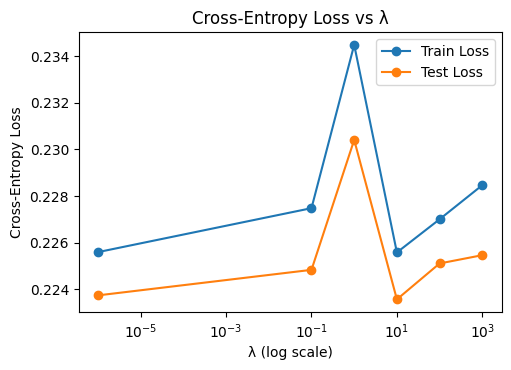

In [5]:
all_weights = np.array(all_weights)

# -----------------------------
# PLOTS
# -----------------------------
plt.figure(figsize=(12, 8))

# 1. Cross-entropy loss
plt.subplot(2,2,1)
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss vs λ")
plt.legend()

Text(0.5, 1.0, 'L2 Norm of Weights vs λ')

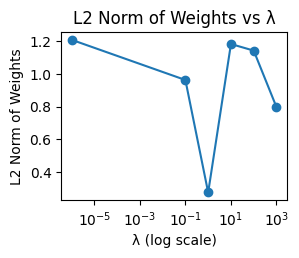

In [6]:
# 2. L2 Norm of weights
plt.subplot(2,2,2)
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("L2 Norm of Weights vs λ")

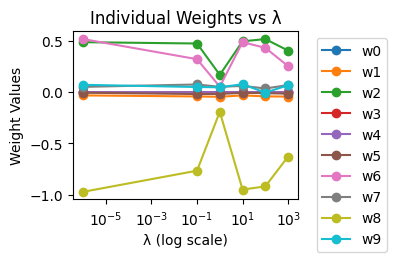

In [7]:
# 3. Weights values
plt.subplot(2,2,3)
for i in range(all_weights.shape[1]):
    plt.plot(lambdas, all_weights[:, i], marker='o', label=f"w{i}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight Values")
plt.title("Individual Weights vs λ")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

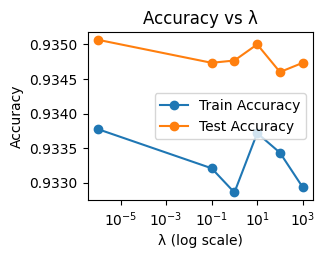

In [9]:
# 4. Accuracy
plt.subplot(2,2,4)
plt.plot(lambdas, train_accs, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_accs, marker='o', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()
plt.show()

Running for σ = 0.1
Running for σ = 0.5
Running for σ = 1
Running for σ = 5
Running for σ = 10


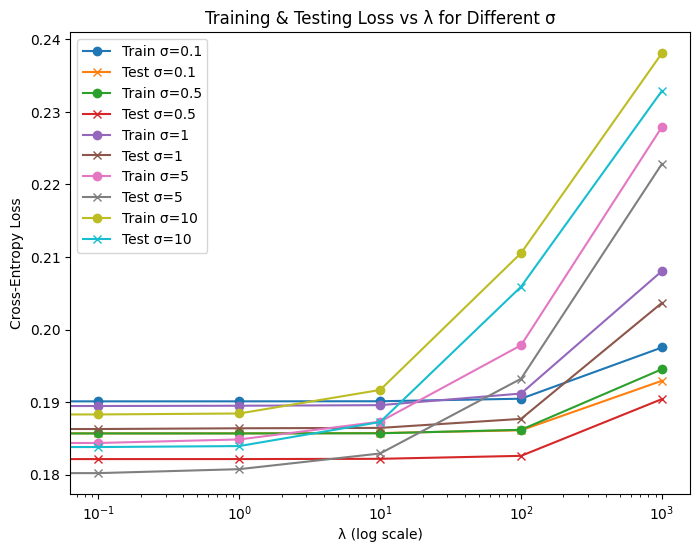

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Gaussian basis expansion
def gaussian_basis_transform(X, sigma=1.0, n_basis=5):
    """
    Expands each feature in X into Gaussian basis functions.
    Means are evenly spaced between -10 and 10.
    """
    means = np.linspace(-10, 10, n_basis)
    X_new = []
    for col in X.T:   # now works with NumPy array directly
        feats = [np.exp(-(col - m) ** 2 / (2 * sigma ** 2)) for m in means]
        X_new.append(np.array(feats).T)
    return np.hstack(X_new)


# Regularization strengths: λ and corresponding C = 1/λ
lambdas = [0, 0.1, 1, 10, 100, 1000]
C_values = [1e6 if lam == 0 else 1/lam for lam in lambdas]  # large C ~ no regularization

# σ values to test
sigmas = [0.1, 0.5, 1, 5, 10]

# Dictionary to store results
results = {}

for sigma in sigmas:
    print(f"Running for σ = {sigma}")

    # Transform the data
    X_train_g = gaussian_basis_transform(X_train, sigma)
    X_test_g = gaussian_basis_transform(X_test, sigma)

    train_losses, test_losses, train_accs, test_accs = [], [], [], []

    for C, lam in zip(C_values, lambdas):
        log_reg = LogisticRegression(
            penalty="l2", C=C, solver="lbfgs", max_iter=1000
        )
        log_reg.fit(X_train_g, y_train)

        # Predictions (probabilities)
        ytr_p = log_reg.predict_proba(X_train_g)[:, 1]
        yte_p = log_reg.predict_proba(X_test_g)[:, 1]

        # Compute losses & accuracy
        train_losses.append(log_loss(y_train, ytr_p))
        test_losses.append(log_loss(y_test, yte_p))
        train_accs.append(accuracy_score(y_train, log_reg.predict(X_train_g)))
        test_accs.append(accuracy_score(y_test, log_reg.predict(X_test_g)))

    # Store all results for this σ
    results[sigma] = {
        "train_losses": train_losses,
        "test_losses": test_losses,
        "train_accs": train_accs,
        "test_accs": test_accs
    }

# Example plot: Training vs Testing Loss for different σ
plt.figure(figsize=(8,6))
for sigma in sigmas:
    plt.plot(lambdas, results[sigma]["train_losses"], marker="o", label=f"Train σ={sigma}")
    plt.plot(lambdas, results[sigma]["test_losses"], marker="x", label=f"Test σ={sigma}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training & Testing Loss vs λ for Different σ")
plt.legend()
plt.show()


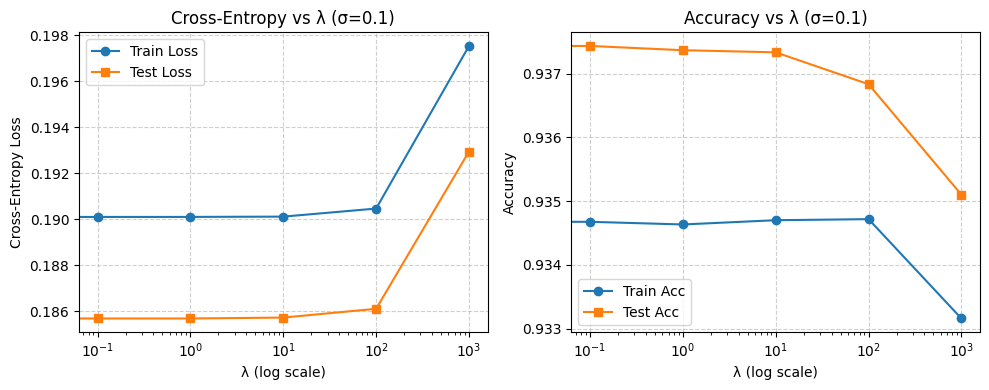

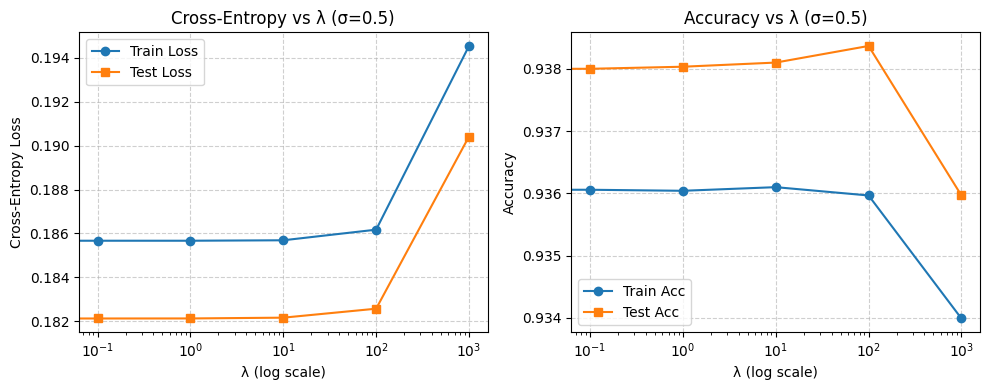

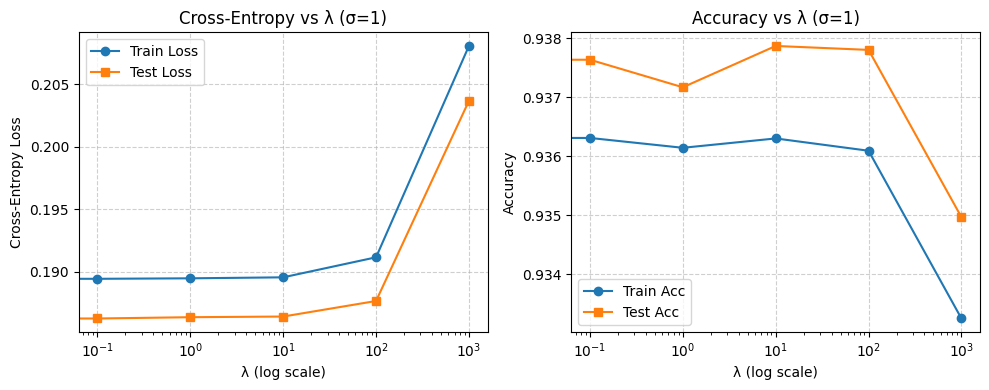

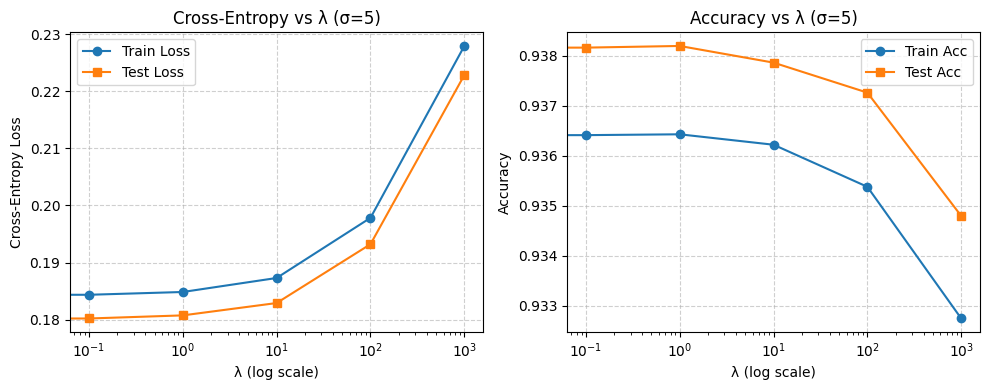

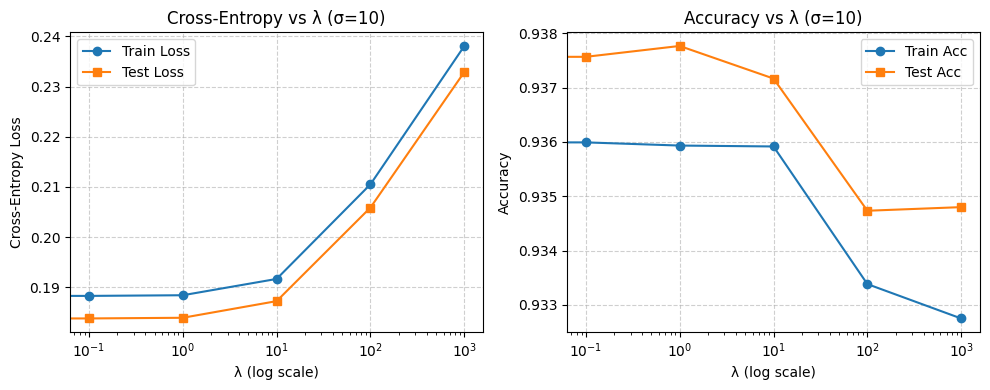

In [15]:
for sigma in sigmas:
    res = results[sigma]

    plt.figure(figsize=(10,4))

    # Cross-Entropy Loss
    plt.subplot(1,2,1)
    plt.plot(lambdas, res["train_losses"], '-o', label="Train Loss")
    plt.plot(lambdas, res["test_losses"], '-s', label="Test Loss")
    plt.xscale("log")
    plt.xlabel("λ (log scale)")
    plt.ylabel("Cross-Entropy Loss")
    plt.title(f"Cross-Entropy vs λ (σ={sigma})")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(lambdas, res["train_accs"], '-o', label="Train Acc")
    plt.plot(lambdas, res["test_accs"], '-s', label="Test Acc")
    plt.xscale("log")
    plt.xlabel("λ (log scale)")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs λ (σ={sigma})")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()

    plt.tight_layout()
    plt.show()


# Part H
If we only use Gaussian basis functions on each input separately, the model can capture patterns in single features, but it misses the relationships between inputs. To capture those relationships, we would design multivariate Gaussian basis functions that depend on two or more inputs at the same time. For example, instead of looking only at x1 or x2 individually, a basis function could be built around (x, x2) together. This allows the model to represent intera

```
# This is formatted as code
```

ctions between features.

**Impact on bias-variance trade-off:**
*Adding these interaction-based Gaussians makes the model more powerful and flexible → bias decreases (the model can fit the data better).

*But it also makes the model more complex → variance increases (the model can overfit if data is limited).

*So, we get better expressiveness, but we must use regularization (like L2 penalty) to keep the model from overfitting.

**Summary:**

To design Gaussian basis functions that capture relationships between inputs, you’d need to use multivariate Gaussian functions defined over the whole input vector, not just one feature at a time. This increases model expressiveness but also raises the risk of overfitting and computational cost.

# Part I

**Learning Algorithm with Adaptive Gaussian Basis Functions:**

So far, we fixed the placement of our Gaussian basis functions (centers μᵢ spaced evenly between –10 and 10). But this is restrictive such that the data might have patterns that do not align well with those fixed centers. A more flexible idea is to learn both the weight vector w and the basis function centers μᵢ from the data itself, while keeping the width σ fixed.

**How this works:**

**1. Model Setupt**

i) Each input x is transformed using Gaussian basis functions:

ϕᵢ(x) = exp(−(x − μᵢ)² / (2σ²))

ii) Predictions are made using a linear model:

ŷ = wᵀϕ(x)

**2. Loss Function**

i) We use the standard error function (e.g., cross-entropy or squared error), plus an L2 penalty on the weights:

L(w, μ) = Error(y, ŷ) + λ‖w‖²

**3. Learning Algorithm (Iterative)**

i) Initialize μᵢ (for example, spread them evenly at the start).

ii) Repeat until convergence:

Update weights w using gradient descent (similar to normal regression with regularization).

Update the centers μᵢ by computing the gradient of the loss with respect to each μᵢ and shifting them slightly in the direction that reduces the error

**4. Intuition**

i) Over time, the μᵢ values “move” to positions in the input space that better represent the data distribution.

ii) The model adapts its basis functions instead of relying on a fixed placement.


In [16]:
"""Initialize mu_j (e.g., K-means), choose sigma, lambda, eta, T
for t in 1..T:
    build Phi[n,j] = exp(-||x_n-mu_j||^2/(2 sigma^2))
    w <- solve((Phi^T Phi + lambda I) w = Phi^T y)   # closed form
    e_n <- y_n - (Phi w)_n
    for each j:
        grad = -(w_j / sigma^2) * sum_n e_n * Phi[n,j] * (x_n - mu_j)
        mu_j <- mu_j - eta * grad
end"""


'Initialize mu_j (e.g., K-means), choose sigma, lambda, eta, T\nfor t in 1..T:\n    build Phi[n,j] = exp(-||x_n-mu_j||^2/(2 sigma^2))\n    w <- solve((Phi^T Phi + lambda I) w = Phi^T y)   # closed form\n    e_n <- y_n - (Phi w)_n\n    for each j:\n        grad = -(w_j / sigma^2) * sum_n e_n * Phi[n,j] * (x_n - mu_j)\n        mu_j <- mu_j - eta * grad\nend'

# Part j
**Yes — the alternating algorithm will typically converge to a solution, but only to a local optimum / stationary point, not to a guaranteed global optimum.**


**Why it tends to converge**

The algorithm is an alternating / block-coordinate procedure:

Given centers
𝜇
μ, the update for
𝑤
w is an exact minimizer of the objective (closed-form ridge solution). That step does not increase the objective.

Given
𝑤
w, the
𝜇
μ-updates are gradient-descent steps on the same objective. With a sufficiently small constant step size or a proper line search (or a diminishing step-size schedule), these updates decrease (or at least do not increase) the objective and drive the gradient toward zero.

Because the objective (regularized squared error or regularized likelihood) is lower-bounded (e.g. by 0 plus the
𝜆
∥
𝑤
∥
2
/
2
λ∥w∥
2
/2 term), repeated decreases produce a monotone nonincreasing sequence of objective values that is bounded below → the objective values converge. Under standard conditions (Lipschitz gradient, suitable step-size), the iterates have limit points that satisfy first-order optimality (i.e., stationary points).

**Why it is only local (not global)**

The overall objective is non-convex in the joint variables
(
𝑤
,
{
𝜇
𝑗
}
)
(w,{μ
j

}) because
𝜙
𝑗
(
𝑥
;
𝜇
𝑗
)
ϕ
j
	​
(x;μ
j
	​
) is a nonlinear function of
𝜇
𝑗
μ
j
	​

. Nonconvex problems can have multiple local minima and saddle points.

Alternating exact minimization in one block and gradient steps in another cannot escape bad local minima or saddles in general. Which local solution you reach depends on initialization (e.g., K-means vs random), learning rate, number of basis functions, σ, etc.

Counterexample intuition: two different placements of centers can produce different fits with different objective values; there is no convexity guarantee that the alternating procedure finds the global best placement.

In [28]:
# 2nd Experiment
# Linear Regression (Regression) and Logistic Regression (Classification)
# with preprocessing steps
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/MLlab/winequality-red.csv")

# -----------------------------
# Data Preprocessing
# -----------------------------
X = df.drop(columns=["quality"])
y_reg = df["quality"]  # for regression

# For classification: good (>=7) vs not good
y_clf = (df["quality"] >= 7).astype(int)

# Train-test split
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [27]:
# Target for regression
y_reg_train = y_reg_train  # wine quality score
y_reg_test = y_reg_test

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_reg_train)
y_pred = lr.predict(X_test_scaled)

# Evaluate
print("Linear Regression Results (Wine Quality):")
print("MSE:", mean_squared_error(y_reg_test, y_pred))
print("R^2:", r2_score(y_reg_test, y_pred))


Linear Regression Results (Wine Quality):
MSE: 0.4471637026003249
R^2: 0.39158167491000173


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ridge Regression
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_reg_train)
y_ridge_pred = ridge.predict(X_test_scaled)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_reg_test, y_ridge_pred))  # works in all versions
r2 = r2_score(y_reg_test, y_ridge_pred)

print("\nRidge Regression Results (Wine Quality):")
print("RMSE:", rmse)
print("R^2:", r2)



Ridge Regression Results (Wine Quality):
RMSE: 0.6685990672460547
R^2: 0.3917707868354646


In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_reg_train)              # Use y_reg_train
y_lasso_pred = lasso.predict(X_test_scaled)         # Predictions

# Evaluation
rmse = np.sqrt(mean_squared_error(y_reg_test, y_lasso_pred))
r2 = r2_score(y_reg_test, y_lasso_pred)

print("Lasso Regression Results (Wine Quality):")
print("RMSE:", rmse)
print("R^2:", r2)


Lasso Regression Results (Wine Quality):
RMSE: 0.712063990797587
R^2: 0.3101196252479934


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train logistic regression
log_reg = LogisticRegression(max_iter=1000, penalty="l2")
log_reg.fit(X_train_scaled, y_clf_train)         # Use classification target

# Predictions
y_clf_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("\nLogistic Regression Results (Wine Quality):")
print("Accuracy:", accuracy_score(y_clf_test, y_clf_pred))
print("\nClassification Report:\n", classification_report(y_clf_test, y_clf_pred))




Logistic Regression Results (Wine Quality):
Accuracy: 0.89375

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320



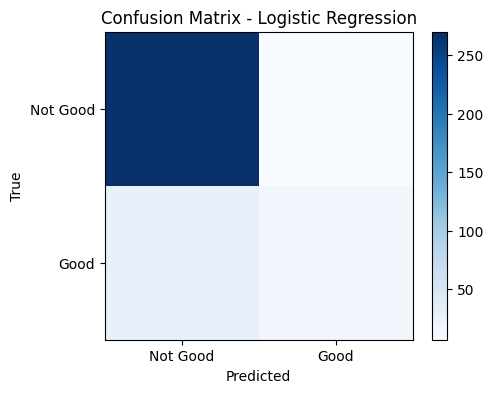

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# y_clf_test: true labels
# y_clf_pred: predicted labels from logistic regression
cm = confusion_matrix(y_clf_test, y_clf_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks([0,1], ["Not Good", "Good"])
plt.yticks([0,1], ["Not Good", "Good"])
plt.show()
